# Problem Statement
Prepare a prediction model for profit of 50_startups data.Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.
* R&D Spend -- Research and devolop spend in the past few years
* Administration -- spend on administration in the past few years
* Marketing Spend -- spend on Marketing in the past few years
* State -- states from which data is collected
* Profit  -- profit of each state in the past few years

# Importing Necessary Libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
from warnings import filterwarnings
filterwarnings('ignore')

# Importing Data

In [81]:
raw_data = pd.read_csv('50_Startups.csv')
data = raw_data.copy()
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Exploratory Data Analysis

In [82]:
data = data.replace(0, np.nan)
data = data.dropna(how='any', axis=0)                # REPLACING 0 ENTRIES WITH NAN VALUES AND DROPPING THEM

In [83]:
data = data[data['R&D Spend'] > 10000]              # Removing the Outliers

In [84]:
data = data.reset_index(drop=True)                   # resetting the index

In [85]:
data.info()                                           

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        44 non-null     float64
 1   Administration   44 non-null     float64
 2   Marketing Spend  44 non-null     float64
 3   State            44 non-null     object 
 4   Profit           44 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.8+ KB


In [86]:
data.describe(include='all')

,R&D Spend,Administration,Marketing Spend,State,Profit
count,44.000000,44.000000,44.000000,44,44.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,California,NaN
freq,NaN,NaN,NaN,15,NaN
mean,81745.530455,122036.244318,231978.714545,NaN,119784.630227
std,41341.933344,27411.082451,107965.109686,NaN,34297.025963
min,15505.730000,51283.140000,28334.720000,NaN,65200.330000
25%,53226.980000,102579.505000,146144.535000,NaN,96762.390000
50%,75791.365000,122699.795000,239452.750000,NaN,109543.120000
75%,115878.517500,145190.700000,303681.627500,NaN,144725.037500


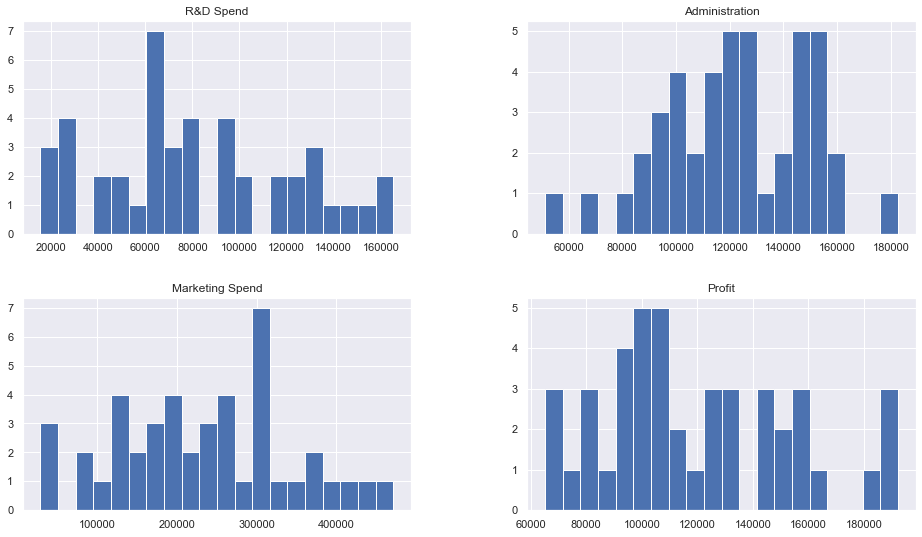

In [87]:
data.hist(bins = 20, figsize = (16,9))
plt.show()

# Looking for Correlations

In [88]:
corr_matrix = data.corr()

In [89]:
corr_matrix["Profit"].sort_values(ascending=False)
# Correlation of dependent variable with independent variables

Profit             1.000000
R&D Spend          0.975669
Marketing Spend    0.780891
Administration     0.137310
Name: Profit, dtype: float64

In [90]:
data.corr()                                    # Correlation Matrix

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.20567,0.741366,0.975669
Administration,0.205670,1.00000,-0.083480,0.137310
Marketing Spend,0.741366,-0.08348,1.000000,0.780891
Profit,0.975669,0.13731,0.780891,1.000000


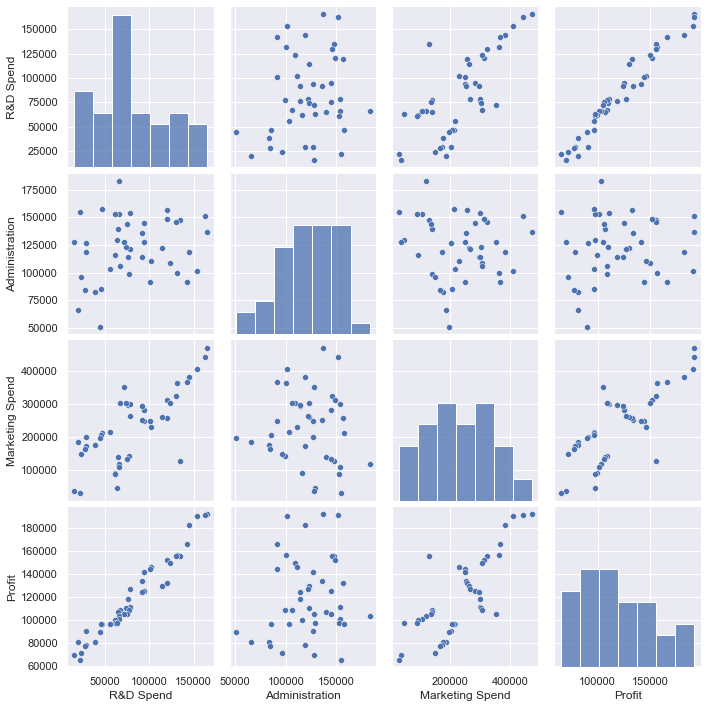

In [91]:
sns.pairplot(data)
plt.show()

<AxesSubplot:xlabel='Administration', ylabel='Profit'>

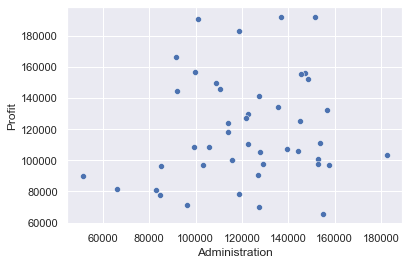

In [92]:
sns.scatterplot(data['Administration'], data['Profit'])
# This Scatter Plot is random, that is, Administration variable does not effect Profit. So, we remove it from regression

In [93]:
slr_model = smf.ols('Profit ~ Administration', data = data).fit()
slr_model.pvalues

Intercept         0.000167
Administration    0.374103
dtype: float64

# Dealing with Dummies

In [94]:
data_with_dummies = pd.get_dummies(data = data, columns = ['State'])

In [95]:
data_with_dummies.head()

,R&D Spend,Administration,Marketing Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [96]:
data_with_dummies.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit',
       'State_California', 'State_Florida', 'State_New York'],
      dtype='object')

In [97]:
cols = ['Profit','R&D Spend', 'Administration', 'Marketing Spend','State_California', 'State_Florida', 'State_New York']
data_cleaned = data_with_dummies[cols]

# Creating a Multiple Linear Regression

In [98]:
inputs = data_cleaned.drop(['Profit','Administration'],axis=1)
targets = data_cleaned['Profit']

In [99]:
model = smf.ols('targets ~ inputs', data = data_cleaned).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                targets   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     238.3
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           7.74e-27
Time:                        15:23:49   Log-Likelihood:                -450.22
No. Observations:                  44   AIC:                             910.4
Df Residuals:                      39   BIC:                             919.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.758e+04   2019.997     18.603      0.000    3.35e+04    4.17e+04
inputs[0]      0.7309      0.039     18.617      0.000       0.651       0.810
inputs[1]      0.0427      0.015      2.818      0.008       0.012       0.073
inputs[2]   1.411e+04   1569.561      8.989      0.000    1.09e+04    1.73e+04
inputs[3]   1.253e+04   1703.526      7.358      0.000    9088.729     1.6e+04
inputs[4]   1.093e+04   1756.847      6.224      0.000    7381.069    1.45e+04
==============================================================================
Omnibus:                        0.076   Durbin-Watson:                   1.576
Prob(Omnibus):                  0.963   Jarque-Bera (JB):                0.160
Skew:                           0.090   Prob(JB):                        0.923
Kurtosis:                       2.765   Cond. No.                     2.36e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.76e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Multicollinearity

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['R&D Spend','Marketing Spend', 'State_California', 'State_Florida', 'State_New York']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [101]:
vif

,VIF,Features
0,2.221502,R&D Spend
1,2.253930,Marketing Spend
2,2.399772,State_California
3,2.978055,State_Florida
4,2.903386,State_New York


# Model Prediction

In [102]:
predictions = model.predict(inputs)

In [103]:
predictions = pd.DataFrame(predictions, columns=['Fitted_Values'])
predictions.head()

,Fitted_Values
0,189494.825768
1,189467.431578
2,179666.871908
3,170383.124914
4,169600.660494


In [104]:
predictions['Actual_Values']    = targets
predictions['Residuals']  = predictions['Actual_Values'] - predictions['Fitted_Values']
predictions['%Residuals'] = (predictions['Residuals']*100/predictions['Actual_Values'])
predictions.head()

,Fitted_Values,Actual_Values,Residuals,%Residuals
0,189494.825768,192261.83,2767.004232,1.439185
1,189467.431578,191792.06,2324.628422,1.212057
2,179666.871908,191050.39,11383.518092,5.958385
3,170383.124914,182901.99,12518.865086,6.844576
4,169600.660494,166187.94,-3412.720494,-2.053531


# Normalilty of Residuals

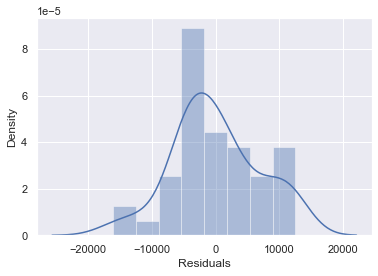

In [105]:
sns.distplot(predictions['Residuals'])
plt.show()

# Homoscedasticity

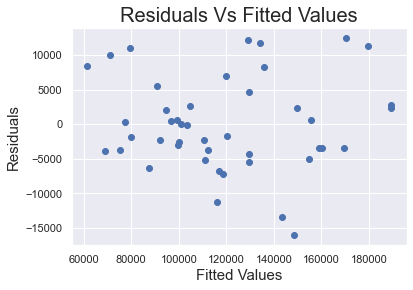

In [106]:
plt.scatter(x = predictions['Fitted_Values'],y = predictions['Residuals'])
plt.title('Residuals Vs Fitted Values',fontsize = 20)
plt.xlabel('Fitted Values',fontsize = 15)
plt.ylabel('Residuals',fontsize = 15)
plt.show()

# No Auto-Correlation of Residuals -  Assumption Check

In [107]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(predictions['Residuals'])

1.5757950963824487

# Transformations

In [108]:
data_cleaned['log_Profit'] = np.log(data_cleaned['Profit'])

In [109]:
data_cleaned.head()

,Profit,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,log_Profit
0,192261.83,165349.20,136897.80,471784.10,0,0,1,12.166613
1,191792.06,162597.70,151377.59,443898.53,1,0,0,12.164167
2,191050.39,153441.51,101145.55,407934.54,0,1,0,12.160292
3,182901.99,144372.41,118671.85,383199.62,0,0,1,12.116706
4,166187.94,142107.34,91391.77,366168.42,0,1,0,12.020875


In [110]:
inputs2 = data_cleaned.drop(['Profit','Administration','log_Profit'], axis=1)
targets2 = data_cleaned['log_Profit']

In [111]:
model2 = smf.ols('targets2 ~ inputs2', data = data_cleaned).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               targets2   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     208.9
Date:                Fri, 02 Sep 2022   Prob (F-statistic):           8.99e-26
Time:                        15:23:49   Log-Likelihood:                 61.794
No. Observations:                  44   AIC:                            -113.6
Df Residuals:                      39   BIC:                            -104.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.3122      0.018    465.661      0.000       8.276       8.348
inputs2[0]  6.137e-06   3.47e-07     17.691      0.000    5.44e-06    6.84e-06
inputs2[1]  2.974e-07   1.34e-07      2.223      0.032    2.68e-08    5.68e-07
inputs2[2]     2.7742      0.014    200.012      0.000       2.746       2.802
inputs2[3]     2.7811      0.015    184.744      0.000       2.751       2.812
inputs2[4]     2.7570      0.016    177.583      0.000       2.726       2.788
==============================================================================
Omnibus:                        0.000   Durbin-Watson:                   1.330
Prob(Omnibus):                  1.000   Jarque-Bera (JB):                0.114
Skew:                           0.001   Prob(JB):                        0.945
Kurtosis:                       2.751   Cond. No.                     2.36e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.76e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# R^2 Table

In [112]:
r_squared = pd.DataFrame({'Models'    : ['Model without Transformations','Model with Log Transformation of Profit Variable'],
                          'R-Squared' : [model.rsquared,model2.rsquared]
                         })

In [113]:
r_squared

,Models,R-Squared
0,Model without Transformations,0.960686
1,Model with Log Transformation of Profit Variable,0.955407
